In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
from Gradient_Descent_Algorithms import *

In [2]:
X = np.arange(0, 20, 1)
Y = 1 + 5*X**2 + X**3
print(Y)

[   1    7   29   73  145  251  397  589  833 1135 1501 1937 2449 3043
 3725 4501 5377 6359 7453 8665]


In [3]:
iterations = 8000
alpha = 0.6
n = 3
wnorm, bnorm, costHistory, wHistory, bHistory, XNorm = gradDescentPoly(X, Y, n, alpha, iterations)

y_predict = wnorm[0]*XNorm[:,0] + wnorm[1]*XNorm[:,1] + wnorm[2]*XNorm[:,2] + bnorm
print(y_predict)

[1.08614762e+00 7.03570868e+00 2.89986612e+01 7.29734766e+01
 1.44958626e+02 2.50952582e+02 3.96953815e+02 5.88960796e+02
 8.32971998e+02 1.13498589e+03 1.50100095e+03 1.93701564e+03
 2.44902844e+03 3.04303781e+03 3.72504223e+03 4.50104018e+03
 5.37703011e+03 6.35901051e+03 7.45297985e+03 8.66493658e+03]


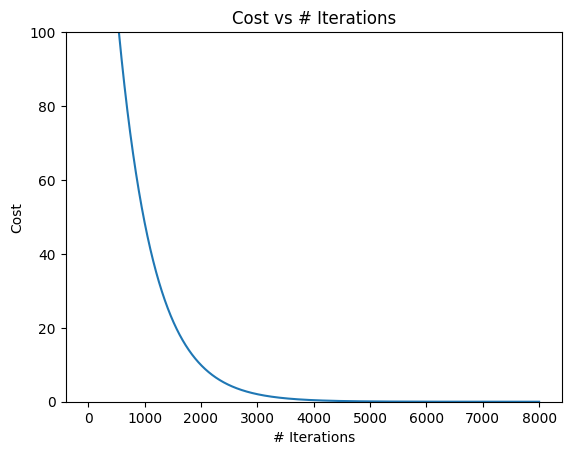

In [4]:
Jx = list(range(iterations))
plt.plot(Jx, costHistory)
plt.ylim(0, 100)  # Set y-axis limits (zoom in on cost function, otherwise scale washes out ability to eye convergence)
plt.title('Cost vs # Iterations')
plt.xlabel('# Iterations')
plt.ylabel('Cost') 
plt.show()

In [ ]:
# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(X, Y, label='Training Data (Feature 1)')

# generate array of predicted target values for each iteration
ypred = np.zeros((len(Y), iterations))

for i in range(len(Y)):
    for j in range(iterations):
        for k in range(n):
            ypred[i, j] += wHistory[j, k] * XNorm[i, k]
        ypred[i, j] = ypred[i, j] + bHistory[j]

# Animate each iteration over scatter plot
def update(frame):
    ax.clear()  # Clear previous plot
    ax.scatter(X, Y, label='Training Data (Feature 1)')
    yset = ypred[:, frame]
    ax.plot(X, yset, label=f'Iteration {frame}')
    ax.set_title('Gradient Descent Training Progression')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.legend()

animation = FuncAnimation(fig, update, frames=range(0, 100, 5), interval = 1000, repeat=False)

# Display the animation as HTML for use in Jupyter Notebook
html_anim = HTML(animation.to_jshtml())
html_anim